In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C

In [3]:
import tensorflow as tf
gpu_available = tf.test.is_gpu_available()
gpu_available

2023-09-26 15:42:38.046541: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2023-09-26 15:42:40.019303: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-26 15:42:40.020110: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-09-26 15:42:40.514972: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-09-26 15:42:40.518651: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 3

True

In [4]:
DATAPATH='/raid/mpsych/CACTAS/DATA/ESUS'

In [5]:
images, labels = C.Helper.load_data(DATAPATH)

In [6]:
X_train, y_train, X_test, y_test = C.Helper.split_patients(images, labels)

In [7]:
X_train, y_train, X_test, y_test = C.Helper.normalization(DATAPATH, X_train, y_train, X_test, y_test)

In [8]:
X_train, y_train, X_test, y_test = C.Helper.extract_slices(X_train, y_train, X_test, y_test)

(13407, 512, 512, 1) (13407, 512, 512, 1) (3359, 512, 512, 1) (3359, 512, 512, 1)


In [9]:
X_train, y_train, X_test, y_test = C.Helper.filter_slices(X_train, y_train, X_test, y_test)

(563, 512, 512, 1) (563, 512, 512, 1) (151, 512, 512, 1) (151, 512, 512, 1)


In [10]:
train_gen = C.Helper.augment(X_train, y_train)

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [11]:
model = C.Helper.create_unet(X_train[0].shape)

2023-09-26 15:45:11.775685: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-09-26 15:45:11.779548: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-09-26 15:45:11.795519: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0, 1
2023-09-26 15:45:11.800310: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-09-26 15:45:11.804555: I tensorflow/core

In [12]:
model, history = C.Helper.train_unet(train_gen, X_train, y_train, X_test, y_test, model, epochs=500)

2023-09-26 15:45:13.146679: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-09-26 15:45:13.164813: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245800000 Hz


Epoch 1/200


2023-09-26 15:45:14.359098: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-09-26 15:45:14.973641: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-09-26 15:45:15.623160: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-09-26 15:45:15.623182: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-09-26 15:45:15.623245: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-09-26 15:45:15.713928: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-09-26 15:45:16.416610: I tensorflow/stream_exec

18/18 [==============================] - 59s 2s/step - loss: 0.3084 - iou: 1.0694e-04 - iou_thresholded: 5.1334e-04 - val_loss: 0.0328 - val_iou: 1.5368e-05 - val_iou_thresholded: 8.1155e-04
Epoch 2/200
18/18 [==============================] - 18s 994ms/step - loss: 0.0377 - iou: 2.2867e-05 - iou_thresholded: 7.4372e-04 - val_loss: 0.0246 - val_iou: 4.4787e-05 - val_iou_thresholded: 8.3279e-04
Epoch 3/200
18/18 [==============================] - 18s 993ms/step - loss: 0.0205 - iou: 2.5302e-05 - iou_thresholded: 7.4954e-04 - val_loss: 0.0130 - val_iou: 3.2838e-05 - val_iou_thresholded: 8.3279e-04
Epoch 4/200
18/18 [==============================] - 18s 990ms/step - loss: 0.0115 - iou: 5.0915e-05 - iou_thresholded: 7.6408e-04 - val_loss: 0.0057 - val_iou: 6.0004e-05 - val_iou_thresholded: 8.3279e-04
Epoch 5/200
18/18 [==============================] - 18s 991ms/step - loss: 0.0053 - iou: 1.4125e-04 - iou_thresholded: 7.6580e-04 - val_loss: 0.0026 - val_iou: 1.7152e-04 - val_iou_threshold

18/18 [==============================] - 18s 990ms/step - loss: 6.1522e-04 - iou: 0.0832 - iou_thresholded: 7.7191e-04 - val_loss: 8.4234e-04 - val_iou: 0.0611 - val_iou_thresholded: 8.3279e-04
Epoch 42/200
18/18 [==============================] - 18s 991ms/step - loss: 5.9092e-04 - iou: 0.0908 - iou_thresholded: 7.4142e-04 - val_loss: 9.5860e-04 - val_iou: 0.0576 - val_iou_thresholded: 8.3254e-04
Epoch 43/200
18/18 [==============================] - 18s 988ms/step - loss: 5.7266e-04 - iou: 0.0953 - iou_thresholded: 8.2229e-04 - val_loss: 9.0261e-04 - val_iou: 0.0619 - val_iou_thresholded: 8.3178e-04
Epoch 44/200
18/18 [==============================] - 18s 993ms/step - loss: 5.7203e-04 - iou: 0.0998 - iou_thresholded: 8.9411e-04 - val_loss: 8.4146e-04 - val_iou: 0.0666 - val_iou_thresholded: 8.3189e-04
Epoch 45/200
18/18 [==============================] - 18s 989ms/step - loss: 5.6494e-04 - iou: 0.1030 - iou_thresholded: 9.4063e-04 - val_loss: 9.9213e-04 - val_iou: 0.0590 - val_iou_th

Epoch 82/200
18/18 [==============================] - 18s 992ms/step - loss: 2.8822e-04 - iou: 0.3774 - iou_thresholded: 0.5096 - val_loss: 5.2359e-04 - val_iou: 0.2230 - val_iou_thresholded: 0.3558
Epoch 83/200
18/18 [==============================] - 18s 990ms/step - loss: 2.9187e-04 - iou: 0.3808 - iou_thresholded: 0.5090 - val_loss: 5.1451e-04 - val_iou: 0.2253 - val_iou_thresholded: 0.3645
Epoch 84/200
18/18 [==============================] - 18s 986ms/step - loss: 2.6760e-04 - iou: 0.3971 - iou_thresholded: 0.5353 - val_loss: 5.3986e-04 - val_iou: 0.2259 - val_iou_thresholded: 0.3785
Epoch 85/200
18/18 [==============================] - 18s 992ms/step - loss: 2.6390e-04 - iou: 0.3956 - iou_thresholded: 0.5296 - val_loss: 5.4371e-04 - val_iou: 0.2262 - val_iou_thresholded: 0.3669
Epoch 86/200
18/18 [==============================] - 18s 988ms/step - loss: 2.5523e-04 - iou: 0.4144 - iou_thresholded: 0.5491 - val_loss: 5.7509e-04 - val_iou: 0.2232 - val_iou_thresholded: 0.3672
Epoch

18/18 [==============================] - 18s 992ms/step - loss: 1.3202e-04 - iou: 0.6231 - iou_thresholded: 0.7231 - val_loss: 8.0452e-04 - val_iou: 0.3140 - val_iou_thresholded: 0.3770
Epoch 124/200
18/18 [==============================] - 18s 986ms/step - loss: 1.2805e-04 - iou: 0.6293 - iou_thresholded: 0.7302 - val_loss: 7.8493e-04 - val_iou: 0.3164 - val_iou_thresholded: 0.3817
Epoch 125/200
18/18 [==============================] - 18s 991ms/step - loss: 1.2358e-04 - iou: 0.6394 - iou_thresholded: 0.7415 - val_loss: 7.9449e-04 - val_iou: 0.3100 - val_iou_thresholded: 0.3774
Epoch 126/200
18/18 [==============================] - 18s 987ms/step - loss: 1.2305e-04 - iou: 0.6423 - iou_thresholded: 0.7383 - val_loss: 8.0290e-04 - val_iou: 0.3191 - val_iou_thresholded: 0.3748
Epoch 127/200
18/18 [==============================] - 18s 987ms/step - loss: 1.2245e-04 - iou: 0.6413 - iou_thresholded: 0.7408 - val_loss: 8.0725e-04 - val_iou: 0.3021 - val_iou_thresholded: 0.3745
Epoch 128/200


18/18 [==============================] - 18s 988ms/step - loss: 7.6062e-05 - iou: 0.7506 - iou_thresholded: 0.8292 - val_loss: 0.0011 - val_iou: 0.3386 - val_iou_thresholded: 0.3642
Epoch 165/200
18/18 [==============================] - 18s 987ms/step - loss: 7.4406e-05 - iou: 0.7567 - iou_thresholded: 0.8310 - val_loss: 0.0012 - val_iou: 0.3385 - val_iou_thresholded: 0.3630
Epoch 166/200
18/18 [==============================] - 18s 990ms/step - loss: 7.2014e-05 - iou: 0.7627 - iou_thresholded: 0.8377 - val_loss: 0.0013 - val_iou: 0.3304 - val_iou_thresholded: 0.3463
Epoch 167/200
18/18 [==============================] - 18s 986ms/step - loss: 6.6927e-05 - iou: 0.7720 - iou_thresholded: 0.8444 - val_loss: 0.0012 - val_iou: 0.3442 - val_iou_thresholded: 0.3700
Epoch 168/200
18/18 [==============================] - 18s 995ms/step - loss: 6.4597e-05 - iou: 0.7809 - iou_thresholded: 0.8526 - val_loss: 0.0012 - val_iou: 0.3489 - val_iou_thresholded: 0.3722
Epoch 169/200
18/18 [=============

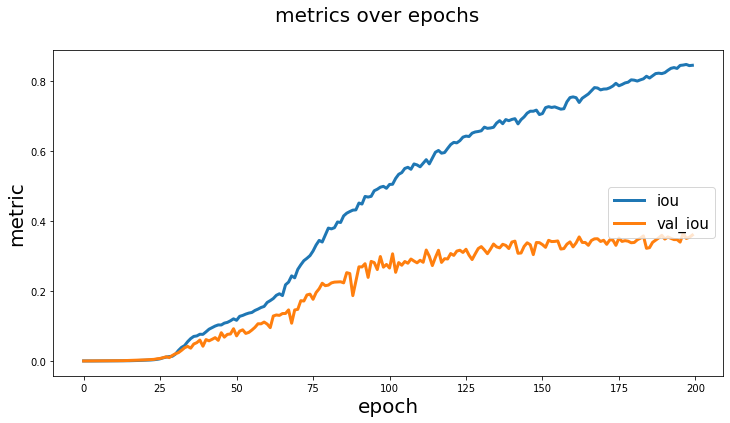

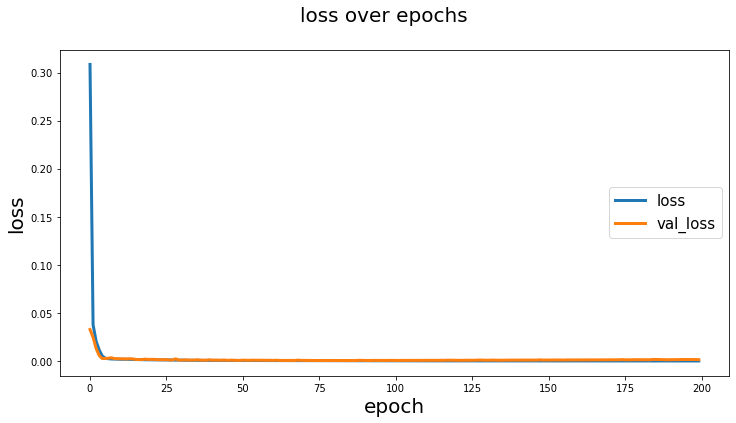

In [13]:
C.Helper.visualize_graph(history)

In [14]:
y_pred = C.Helper.prediction(X_test, model)

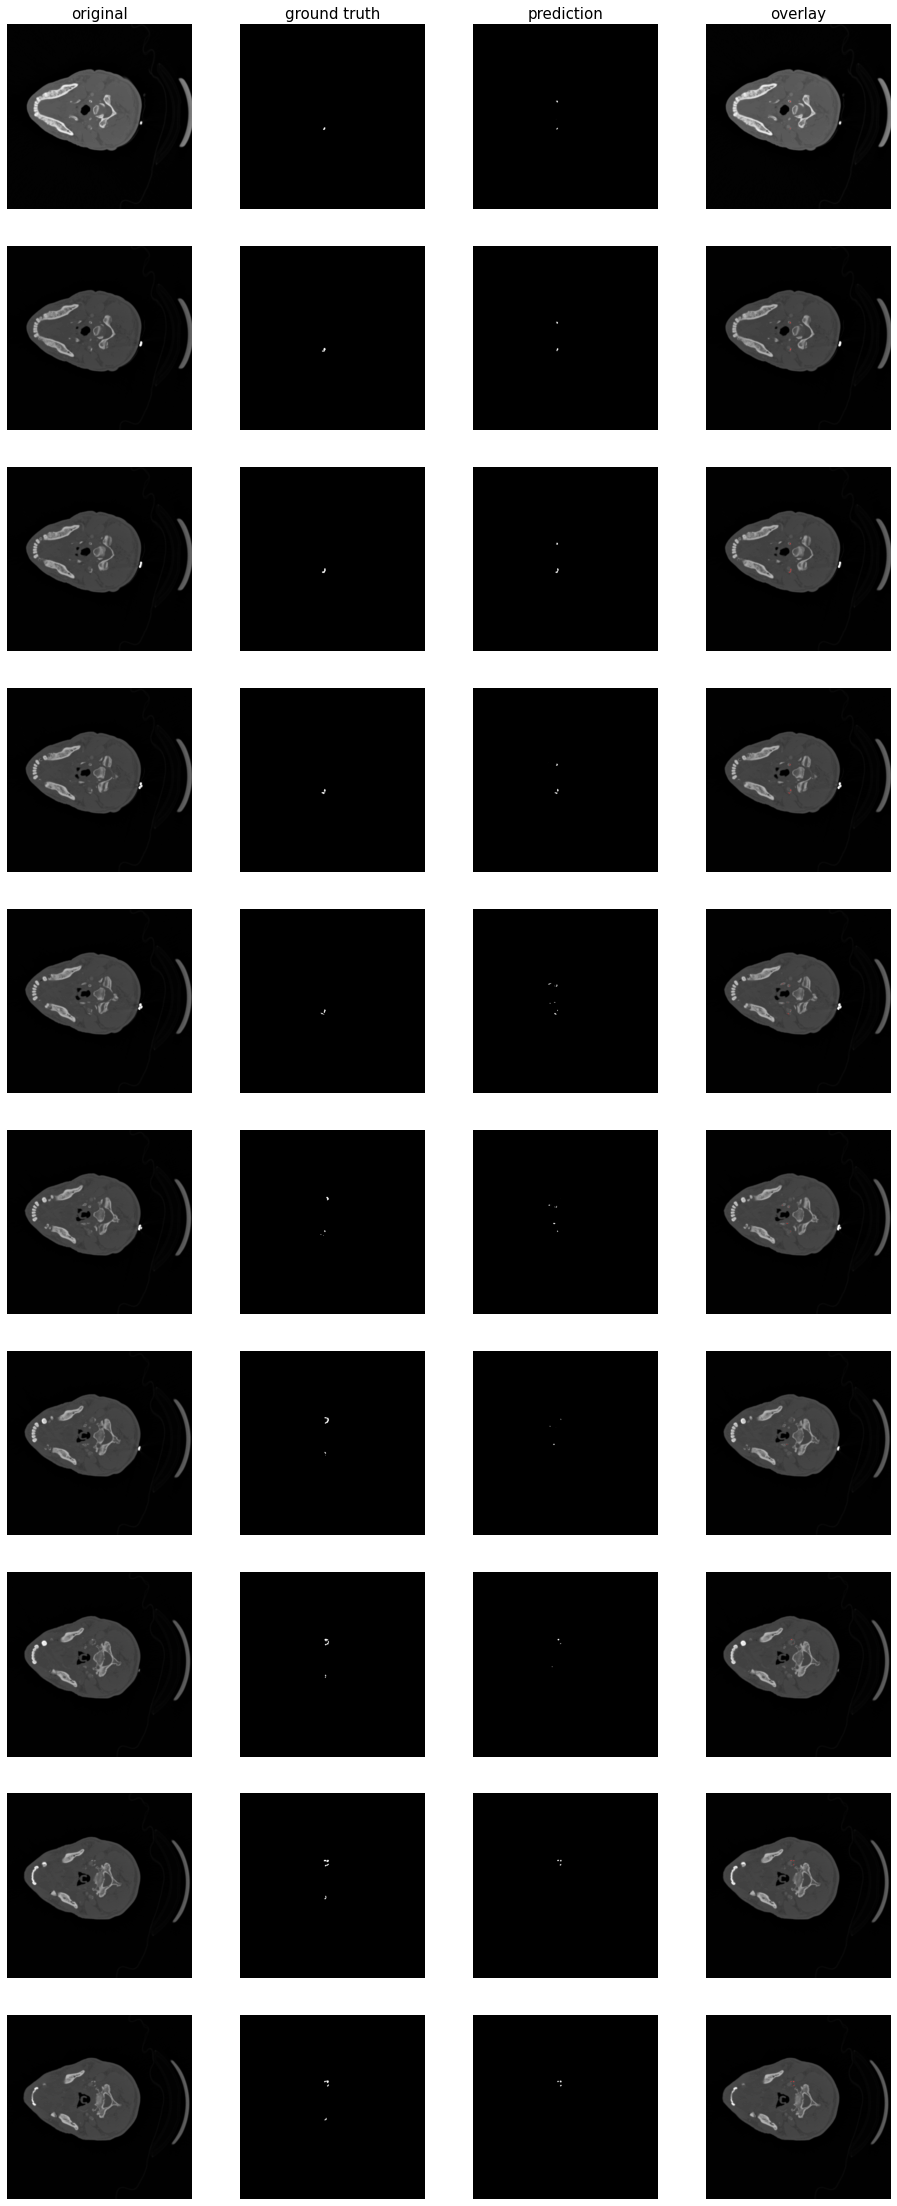

In [15]:
C.Helper.visualize_result(X_test, y_test, y_pred)

In [16]:
C.Helper.evaluate(X_test, y_test, model)

5/5 [==============================] - 1s 204ms/step - loss: 0.0014 - iou: 0.3597 - iou_thresholded: 0.3760
